# All in One for the Exam

Time flies, and the exam is coming. To help you to review the course, we have prepared this notebook, which contains all the materials we have covered in the course. We hope this notebook can help you to review the course and prepare for the exam.

This exam review document __does not cover the materials you studed from the lecture, whereas 
it only covers the materials from tutorial and lab__. You should also review the lecture materials.

Here is the list of topics we have covered and will be covered in the exam:

1. introduction to data.table
2. using data.table to manipulate data
3. basic data visualization
4. introduction to linear regression
5. introduction to logistic regression

## 1. Introduction to data.table

Broadly speaking, there are two kinds of data: __structured data__ and __unstructured data__. 
Structured data is data that has a structure, such as a table, whereas unstructured data is data that does not have a structure, such as a text file. In this course, we focus on structured data. This means all the data we will use look like tables, such 
as the following one:

![data.table-example](../drawio/R-data-table-illustration.png)

> Small story (will not be tested in the exam): I had a talk with a person who is the principal data scientist and  working for the government. He told me that the government is implementing a strategy called "AI in 2030". The goal of this strategy is to make the government to be more data-driven and AI-driven. He told me that every year they have to pay a lot of money to consultancies such as Boston Consulting Group (BCG) to do data analysis for them. He said that the government now is planning to combine data scientist and ChatGPT to do the data analysis. They are hoping that they could reduce 40% of the cost by doing so. The idea is that they will only hire BCG for those very complex data analysis tasks. For those simple tasks, they will use AI to do the data analysis. The main tool that BCG uses is Excel, SQL and Tableau. They are all table-based tools. This means having a good understanding of table-based data analysis is very important. This is why we start from data.table.

The basic syntax of data.table is summarized in the following illustration. __You will
not be tested on the syntax of data.table in the exam__. However, you will be tested on the
underlying concepts of data.table, such as the type of variables (integer, character, factor, etc.).
In the future if you will be working as a data scientist, you can use data.table to do big
data analysis. You will need to know the syntax of data.table for practical use not for the exam.

![data.table-syntax](../drawio/R-data-table-illustration2.png)

### 1.1 data.table Lab

Now, we will use data.table to do some data analysis. We will use the `Community Innovation Survey` (CIS)
to do the analysis. The CIS is a survey that is conducted by the European Union (EU) to collect data
about innovation activities of firms. The survey we will use is the 2021 CIS from Germany.

In [15]:
# install packages
install.packages("stargazer")
# install ISLR if you don't have it
# install.packages("ISLR")
install.packages("corrplot")

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)



In [16]:
# library for data analysis
library(data.table)
library(magrittr)
library(ggplot2)
library(knitr)
library(stargazer)
library(MASS)
library(ISLR)
library(corrplot)

corrplot 0.92 loaded



In [5]:
# read data
cis <- fread("https://raw.githubusercontent.com/oceanumeric/data-science-go-small/main/data/innovation_survey/extmidp21.csv")

In [7]:
# check dimension, which shows 5083 rows and 284 columns
dim(cis)

[1] 5083  284

In [8]:
# take a look at the first 5 rows
head(cis)

id,branche,bran_4,filter,ost,ustaat,gb,bges,gk3n,bges18,...,mkosts,mkosts19,wbp,wbp19,wbpx,wbp19x,invs,invs19,invsx,invs19x
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,...,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
300127,Elektroindustrie,Forschungsintensive Industrie,nein,ost,,Bereich,38.401396,50-249Besch,38.401398,...,,,NA,NA,,,NA,NA,,
301003,Metallerzeugung/-bearbeitung,Sonstige Industrie,ja,ost,,Bereich,4.046923,<50Besch,5.058653,...,.5<=x<.7,.5<=x<.7,0.000000000,0.00000000,keine Stutzung,keine Stutzung,NA,NA,,
301078,Maschinenbau,Forschungsintensive Industrie,nein,west,,Bereich,497.850854,>=250Besch,NA,...,.4<=x<.5,.4<=x<.5,0.007223942,0.01153213,keine Stutzung,keine Stutzung,0.044347249,0.06277719,keine Stutzung,keine Stutzung
301084,Energie/Bergbau/Mineraloel,Sonstige Industrie,ja,west,,Bereich,311.483458,50-249Besch,290.131770,...,x>=.7,x>=.7,0.031338606,0.03232491,keine Stutzung,keine Stutzung,0.002553067,0.00315247,keine Stutzung,keine Stutzung
301189,Energie/Bergbau/Mineraloel,Sonstige Industrie,nein,west,,Bereich,751.191355,>=250Besch,NA,...,x>=.7,x>=.7,0.008867039,0.01385574,keine Stutzung,keine Stutzung,0.153353320,0.09401360,keine Stutzung,keine Stutzung
301282,Elektroindustrie,Forschungsintensive Industrie,nein,west,,Bereich,169.861436,50-249Besch,169.861430,...,,,NA,NA,,,NA,NA,,


From the above table, we can see that we have:

- integer variables: `id`
- character variables: `branche`, `ost`, etc.
- numeric variables (dbl): `bges`, `bges18`, etc.

In [13]:
# now we want to select all variables that are type of dbl (double - numeric like 3.1415926)
# .SD means subset of data in j (select all columns)
# .SDcols means subset columns that are double which is by = is.double
# all things we will do in excel, SQL, or data.table can be summarized as
# I want to do things on rows (i) or columns (j) by some conditions (by)
# here we want to select all columns that are double
cis %>%
    # using [i, j, by] grammar
    .[, .SD, .SDcols = is.double] %>% head()

bges,bges18,bges19,um18,lp18,um19,lp19,um,lp,exs,...,designs,softws19,softws,sv19s,svs,fuesp,wbp,wbp19,invs,invs19
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38.401396,38.401398,38.401398,2.5833666,0.06727272,2.7230081,0.07090909,2.4437252,0.06363636,0.19714285,...,0,NA,NA,NA,NA,0.09090909,NA,NA,NA,NA
4.046923,5.058653,4.046923,0.7658801,0.15140000,0.6920238,0.17100000,0.7203522,0.17800000,0.23033708,...,0,0.000000000,0.00000000,NA,NA,NA,0.000000000,0.00000000,NA,NA
497.850854,NA,NA,113.4919047,0.19259430,120.3409829,0.22119477,99.5714631,0.19166915,0.91077340,...,NA,NA,NA,0.7491919400,0.9608441000,0.02855289,0.007223942,0.01153213,0.044347249,0.06277719
311.483458,290.131770,297.039670,126.4371650,0.41770956,145.0219247,0.46558467,197.2720191,0.59720910,0.02379891,...,0,NA,NA,0.0268479640,0.0184635760,NA,0.031338606,0.03232491,0.002553067,0.00315247
751.191355,NA,NA,913.8067194,NA,861.5917542,NA,851.7221776,0.96375424,NA,...,0,0.004448857,0.00438082,0.0005065734,0.0005832769,NA,0.008867039,0.01385574,0.153353320,0.09401360
169.861436,169.861430,169.861430,27.1778298,0.15384616,28.5367210,0.16153847,28.5367212,0.16153847,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Before we continue, let's get to know the meaning of some variables (we have 41 numeric variables in total, so we will not cover all of them):

- bges: number of employees (average from 2018 to 2020)
- bges18: number of employees in 2018
- um18: sales in 2018
- lp19: labor productivity in 2019
- softws19: software application intensity in 2019
- wbp:  Weiterbildungskostenanteil (share of training costs)
- invs:  Investitionsintensitaet (investment intensity)

From the above table, you can see that we have many `NA` values. This is because the survey is a voluntary survey. This means that firms can choose whether they want to participate in the survey or not. If they choose to participate in the survey, they can choose whether they want to answer all the questions or not. This is why we have many `NA` values - missing values.

This is very common in real-world data. To deal with this issue, we normally do the following (will not be tested in the exam):

- check the number of missing values
- check the pattern of missing values
- decide whether we want to drop the missing values or impute the missing values

In [24]:
# check the number of missing values in each column
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    head(10)

rn,.
<chr>,<int>
wmneup,4902
iap2022,4337
fueoefms,4320
iap2021,4242
fuesp,3745
exeup,3247
exsop,3247
exgbp,3241
ipkosts,3174


#### Missing Values

- wmenup: Umsatzanteil der Weltmarktneuheiten in 2020 (share of world market novelties in 2020)
- lap2022:  Entw. Innovationsaufw. 2022 in % (Development of innovation expenditure 2022 in %)
- fueoefms:  Intensitaet öffentliche FuE-Förderung (Intensity of public R&D funding)

We do not know exactly why we have so many missing values. However, we can guess that the reason is that the firms do not want to disclose the information or do not have information. For instance, because of the pandemic in 2020,
many firms might not have the information about the share of world market novelties in 2020. 
This could be the reason why we have so many missing values for `wmenup`.

We have shown that the sample size is 5083, if one variable has more than 50% missing values, we will drop this variable.
This is because we can do nothing about this variable. If we impute the missing values, we will introduce bias to the data.

In [25]:
dim(cis)

[1] 5083  284

In [29]:
# get variable names that have more than 50% missing values
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    head()
# notice that the variable name of second column is a `.`
# we will rename it as `num_missing` (number of missing values)

rn,.
<chr>,<int>
wmneup,4902
iap2022,4337
fueoefms,4320
iap2021,4242
fuesp,3745
exeup,3247


In [30]:
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    # rename the second column
    setnames(., old = ".", new = "num_missing") %>%
    head()

rn,num_missing
<chr>,<int>
wmneup,4902
iap2022,4337
fueoefms,4320
iap2021,4242
fuesp,3745
exeup,3247


In [31]:
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    # rename the second column
    setnames(., old = ".", new = "num_missing") %>%
    # add missing percentage column
    # nrow is the number of rows in the dataset nrow(cis) = dim(cis)[1] = 5083
    .[, missing_rate := num_missing / nrow(cis)] %>%
    head()

rn,num_missing,missing_rate
<chr>,<int>,<dbl>
wmneup,4902,0.9643911
iap2022,4337,0.8532363
fueoefms,4320,0.8498918
iap2021,4242,0.8345465
fuesp,3745,0.7367696
exeup,3247,0.6387960


> Normally, I will use `%>%` to do everything in one block. However, here I am trying to show you the steps one by one. So, you can see the process clearly.

In [34]:
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    # rename the second column
    setnames(., old = ".", new = "num_missing") %>%
    # add missing percentage column
    # nrow is the number of rows in the dataset nrow(cis) = dim(cis)[1] = 5083
    .[, missing_rate := num_missing / nrow(cis)] %>%
    # filter variables that have missing rate > 0.5
    # we are using [i, j, by] grammar again on rows now
    .[missing_rate >= 0.5]

# as you can see we have 18 variables that have missing rate > 0.5
# we will remove them from the dataset

rn,num_missing,missing_rate
<chr>,<int>,<dbl>
wmneup,4902,0.9643911
iap2022,4337,0.8532363
fueoefms,4320,0.8498918
iap2021,4242,0.8345465
fuesp,3745,0.7367696
exeup,3247,0.6387960
exsop,3247,0.6387960
exgbp,3241,0.6376156
ipkosts,3174,0.6244344


In [37]:
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    # rename the second column
    setnames(., old = ".", new = "num_missing") %>%
    # add missing percentage column
    # nrow is the number of rows in the dataset nrow(cis) = dim(cis)[1] = 5083
    .[, missing_rate := num_missing / nrow(cis)] %>%
    # filter variables that have missing rate > 0.5
    # we are using [i, j, by] grammar again on rows now
    .[missing_rate >= 0.5] %>%
    # select the first column as they are the variable names
    # [i, j, by]
    .[, rn]

[1] "wmneup"     "iap2022"    "fueoefms"   "iap2021"    "fuesp"     
 [6] "exeup"      "exsop"      "exgbp"      "ipkosts"    "ias"       
[11] "iasos"      "iavfues"    "fue_bkosts" "iainvs"     "sv19s"     
[16] "iafues"     "svs"        "fues"

In [7]:
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    # check the number of missing values in each column
    sapply(function(x) sum(is.na(x))) %>%
    # sort the number of missing values in each column
    sort(decreasing = TRUE) %>%
    # convert to data.table and keep rownames as a column
    as.data.table(keep.rownames = TRUE) %>%
    # rename the second column
    setnames(., old = ".", new = "num_missing") %>%
    # add missing percentage column
    # nrow is the number of rows in the dataset nrow(cis) = dim(cis)[1] = 5083
    .[, missing_rate := num_missing / nrow(cis)] %>%
    # filter variables that have missing rate > 0.5
    # we are using [i, j, by] grammar again on rows now
    .[missing_rate >= 0.5] %>%
    # select the first column as they are the variable names
    # [i, j, by]
    # save the variable names to a variable called vars_to_remove
    .[, rn] -> vars_to_remove

In [43]:
# in jupyter notebook we can use vars_to_remove to see the variable names
vars_to_remove

[1] "wmneup"     "iap2022"    "fueoefms"   "iap2021"    "fuesp"     
 [6] "exeup"      "exsop"      "exgbp"      "ipkosts"    "ias"       
[11] "iasos"      "iavfues"    "fue_bkosts" "iainvs"     "sv19s"     
[16] "iafues"     "svs"        "fues"

In [8]:
# or you can print out the variable names
print(vars_to_remove)

 [1] "wmneup"     "iap2022"    "fueoefms"   "iap2021"    "fuesp"     
 [6] "exeup"      "exsop"      "exgbp"      "ipkosts"    "ias"       
[11] "iasos"      "iavfues"    "fue_bkosts" "iainvs"     "sv19s"     
[16] "iafues"     "svs"        "fues"      


In [9]:
# now we will remove the variables from the dataset
cis %>%
    # select variables that are numeric (double)
    .[, .SD, .SDcols = is.double] %>%
    # remove variables that are in vars_to_remove
    # with means we are usig column names instead of column indices
    # at by position
    .[, !vars_to_remove, with = FALSE] %>%
    head()

bges,bges18,bges19,um18,lp18,um19,lp19,um,lp,exs,...,markets,markets19,designs19,designs,softws19,softws,wbp,wbp19,invs,invs19
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38.401396,38.401398,38.401398,2.5833666,0.06727272,2.7230081,0.07090909,2.4437252,0.06363636,0.19714285,...,NA,NA,0,0,NA,NA,NA,NA,NA,NA
4.046923,5.058653,4.046923,0.7658801,0.15140000,0.6920238,0.17100000,0.7203522,0.17800000,0.23033708,...,0.000000000,0.000000000,0,0,0.000000000,0.00000000,0.000000000,0.00000000,NA,NA
497.850854,NA,NA,113.4919047,0.19259430,120.3409829,0.22119477,99.5714631,0.19166915,0.91077340,...,0.002829295,0.009468075,NA,NA,NA,NA,0.007223942,0.01153213,0.044347249,0.06277719
311.483458,290.131770,297.039670,126.4371650,0.41770956,145.0219247,0.46558467,197.2720191,0.59720910,0.02379891,...,0.009550125,0.017433194,0,0,NA,NA,0.031338606,0.03232491,0.002553067,0.00315247
751.191355,NA,NA,913.8067194,NA,861.5917542,NA,851.7221776,0.96375424,NA,...,0.003540181,0.008151944,0,0,0.004448857,0.00438082,0.008867039,0.01385574,0.153353320,0.09401360
169.861436,169.861430,169.861430,27.1778298,0.15384616,28.5367210,0.16153847,28.5367212,0.16153847,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [47]:
# compare with the original dataset
cis %>%
    .[, .SD, .SDcols = is.double] %>%
    dim()  # 41 columns (variables)

[1] 5083   41

In [10]:
cis %>%
    # select variables that are numeric (double)
    .[, .SD, .SDcols = is.double] %>%
    # remove variables that are in vars_to_remove
    # with means we are using column names instead of column indices
    # with means we are using column names instead of column indices
    .[, !vars_to_remove, with = FALSE] %>%
    dim()  # 23 columns (variables)

[1] 5083   23

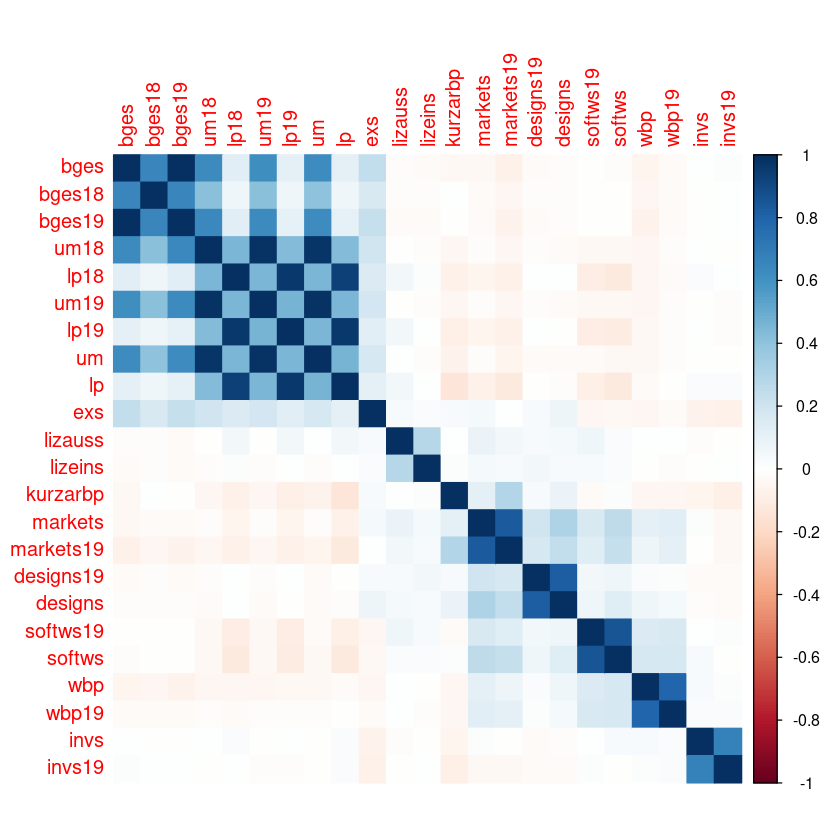

In [17]:
# with all numeric variables and not many missing values
# we can check the correlation between variables
cis %>%
    # select variables that are numeric (double)
    .[, .SD, .SDcols = is.double] %>%
    # remove variables that are in vars_to_remove
    # with means we are using column names instead of column indices
    # with means we are using column names instead of column indices
    .[, !vars_to_remove, with = FALSE] %>%
    # calculate the correlation between variables without missing values
    cor(use = "pairwise.complete.obs") %>%
    # plot the correlation matrix
    corrplot(method = "color")

You might see the correlation plot like the above one in the exam. I will tell you
the meaning of variables:

- bges: number of employees (average from 2018 to 2020)
- bges18: number of employees in 2018
- um18: sales in 2018
- lp19: labor productivity in 2019
- softws19: software application intensity in 2019
- wbp:  Weiterbildungskostenanteil (share of training costs)
- invs:  Investitionsintensitaet (investment intensity)
- exs:  Exportintensitaet insgesamt (total export intensity)
- markets:  Marketingaufwendungen Intensitaet (marketing expenditure intensity)
- designs:  Designaufwendungen Intensitaet (design expenditure intensity)

For instance, I might ask you:

- in the graph, we see the correlated cluster of `markets`, `designs`, and `softws19`. What does this mean?
- in the graph, we see that there is correlation between `exs`, `bges` and `bges18`,
what kind of hypothesis can we make based on this correlation?

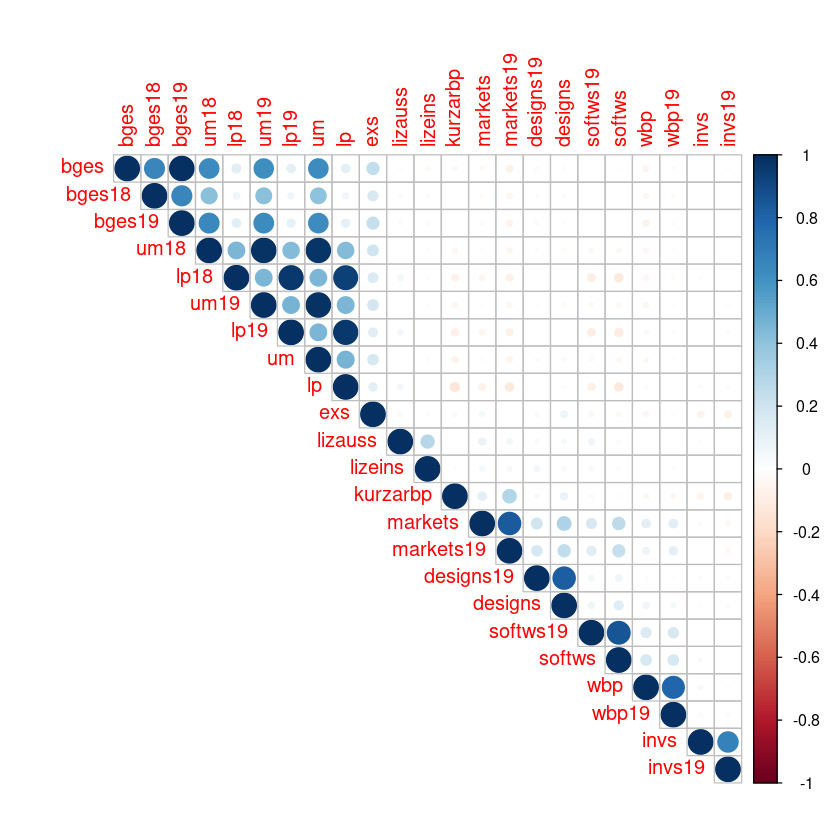

In [19]:
# we can also use circlize to plot the correlation matrix
cis %>%
    # select variables that are numeric (double)
    .[, .SD, .SDcols = is.double] %>%
    # remove variables that are in vars_to_remove
    # with means we are using column names instead of column indices
    # with means we are using column names instead of column indices
    .[, !vars_to_remove, with = FALSE] %>%
    # calculate the correlation between variables without missing values
    cor(use = "pairwise.complete.obs") %>%
    # plot the correlation matrix with circlize with half matrix
    corrplot(method = "circle", type = "upper")

The correlation plot could give us a big picture on what's going on. For instance,

- factors are grouped together based on their correlation
- the bigger the circle, the higher the correlation
- the color of the circle indicates the sign of the correlation (blue: positive, red: negative)

Based on the correlation plot, you can combine your domain knowledge to make hypothesis.

However, __This kind of correlation plot only gives a global picture. It does not tell us the whole story__. For instance, we are not zooming into the industry level analysis. __It is 
very likely that the correlationb between say `markets` and `designs` is different for different industries__. This is why we need to do industry level analysis.